In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'survey_results_public.csv',
 'survey_results_schema.csv',
 'Untitled.ipynb']

# Upload and first Exploration

In [4]:
survey_raw_df =pd.read_csv('survey_results_public.csv')
survey_raw_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
survey_df.info()

NameError: name 'survey_df' is not defined

In [34]:
schema_df_raw = pd.read_csv('survey_results_schema.csv')
schema_df_raw

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


### Set new index

In [35]:
schema_df_raw.set_index("Column", inplace = True)

In [36]:
schema_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, Respondent to YearsCodePro
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   QuestionText  61 non-null     object
dtypes: object(1)
memory usage: 976.0+ bytes


# Data Preparation and cleanning

In [37]:
# Select relevant columns

selected_columns =[
    # Demographics
    'Country', 'Age', 'Gender',
    'EdLevel', 'UndergradMajor',
    #programming exper.
    'Hobbyist', 'Age1stCode', 'YearsCode',
    'YearsCodePro', 
    'LanguageWorkedWith','LanguageDesireNextYear',
    'NEWLearn', 'NEWStuck',
    #Employment
    'Employment', 'DevType', 'WorkWeekHrs',
    'JobSat', 'JobFactors', 'NEWOvertime',
    'NEWEdImpt'
]

len(selected_columns)

20

## Create data Copy 

In [38]:
survey_df = survey_raw_df[selected_columns].copy()
schema = schema_df_raw.loc[selected_columns]

In [39]:
schema.shape

(20, 1)

In [40]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

### convert columns registered as non numerical to numerical
we first need to check why columns like Age1stCode are registered as objects and not as numbers

In [41]:
#we see there are values like 'Older than 85' that can't be registered as numbers
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

### Converting objects to numerical values and convert errors to None values


In [42]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors ='coerce')
survey_df['Age1stCode']

0        13.0
1        19.0
2        15.0
3        18.0
4        16.0
         ... 
64456    16.0
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: Age1stCode, Length: 64461, dtype: float64

In [43]:
#same with all other columns
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors ='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors ='coerce')

In [44]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


## Check with a boxplot
in order to check with a boxplot you need to replace all Nan values with 0 or the mean to check outliers

In [45]:
#this df created is only for visual purpuses not for use in the project
df=survey_df.fillna(survey_df.mean())
df.describe()

C:\Users\Interventoria\AppData\Local\Temp\ipykernel_1696\1626892174.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=survey_df.fillna(survey_df.mean())


,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,64461.000000,64461.000000,64461.000000,64461.000000,64461.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,8.048367,4.828927,8.907591,6.420830,14.235061
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,26.000000,13.000000,6.000000,4.000000,40.000000
50%,30.834111,15.476572,11.000000,8.869667,40.782174
75%,32.000000,18.000000,16.000000,9.000000,40.782174
max,279.000000,85.000000,50.000000,50.000000,475.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x201b4cc75b0>,
 'caps': [<matplotlib.lines.Line2D at 0x201b4cc7af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x201b4cc7310>],
 'medians': [<matplotlib.lines.Line2D at 0x201b4d00070>],
 'fliers': [<matplotlib.lines.Line2D at 0x201b4d00310>],
 'means': []}

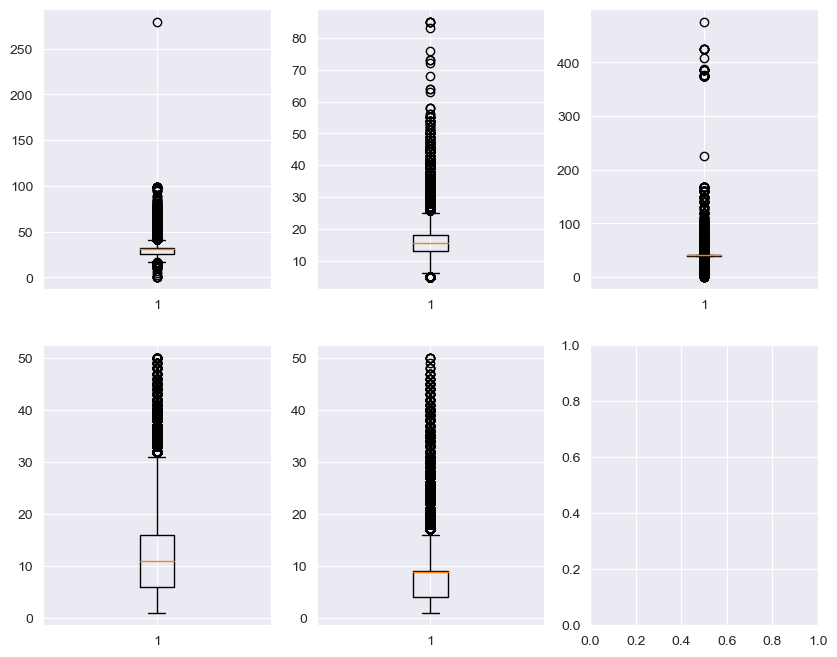

In [46]:
fig, axes = plt.subplots(2,3, figsize=(10,8))
axes[0, 0].boxplot(df['Age']) # has outlier and Age can't be lower than 10 or higher than 100
axes[0, 1].boxplot(df['Age1stCode']) 
axes[1, 0].boxplot(df['YearsCode'])
axes[1, 1].boxplot(df['YearsCodePro'])
axes[0, 2].boxplot(df['WorkWeekHrs']) #week can´t have more than 168h so we should correct this

In [47]:
survey_df.drop(survey_df[survey_df.Age <10].index, inplace = True) #in order to drop we need to pass an index thats why we use .index
survey_df.drop(survey_df[survey_df.Age >100].index, inplace = True)
survey_df['Age'].describe() # Age fixed

count    45436.000000
mean        30.834294
std          9.506982
min         10.000000
25%         24.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [48]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs >140].index, inplace = True)

## Cleanning obj. values

In [49]:
survey_df['Gender'].value_counts()
#we only going to analyze Men -woman and non-binary we are going to replace all values after row 3 with Na values

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [50]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)),np.nan, inplace = True)

In [51]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [52]:
survey_df['Gender'].replace({'Non-binary, genderqueer, or gender non-conforming': 'Non-binary'},inplace=True)
survey_df.Gender.value_counts()

Man           45895
Woman          3835
Non-binary      385
Name: Gender, dtype: int64

## Checking Samples before finishing cleanning

In [53]:
survey_df.sample(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
10794,Israel,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,25.0,4.0,3.0,C#;HTML/CSS;JavaScript;SQL;TypeScript,HTML/CSS;JavaScript;SQL;TypeScript,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, front-end;Developer, full-stack",45.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Somewhat important
59356,Canada,40.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,16.0,22.0,17.0,Bash/Shell/PowerShell;Java;JavaScript;Python,Bash/Shell/PowerShell;Java;JavaScript;PHP;Type...,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Engineering manager,NaN,NaN,NaN,NaN,Somewhat important
6811,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,No,22.0,6.0,5.0,PHP,PHP,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack",NaN,NaN,NaN,NaN,Very important
2687,United States,38.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,18.0,20.0,14.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Bash/Shell/PowerShell;C;C++;Go;HTML/CSS;Java;J...,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, full-stack",40.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
57523,Germany,36.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",Yes,16.0,20.0,16.0,HTML/CSS;Java;JavaScript;Kotlin;PHP;SQL;TypeSc...,HTML/CSS;Java;JavaScript;Kotlin;PHP;SQL;TypeSc...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",13.0,Very satisfied,Flex time or a flexible schedule;Office enviro...,Never,Fairly important


# Exploratory Analysis and data Visualization
Before answering questions it is important to understand the data and how representative the survey is

## Styling grids

In [54]:
sns.set_style('darkgrid')
plt.rcParams["figure.figsize"] = [7.00, 3.50]


# Set the custom color palette


In [55]:
schema_df_raw.loc["Country"]

QuestionText    Where do you live?
Name: Country, dtype: object

In [56]:
#number of countries
survey_df.Country.nunique()

183

In [57]:
top_countries = survey_df.Country.value_counts().head(10)
top_countries

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

<Axes: title={'center': 'where do you live?'}, ylabel='Country'>

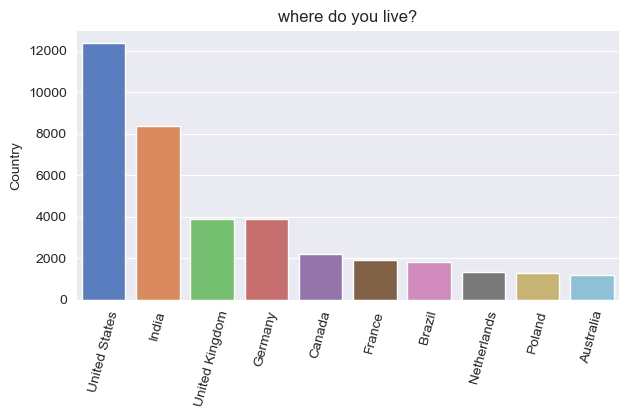

In [58]:
plt.title("where do you live?")
plt.xticks(rotation = 75)
sns.barplot(x =top_countries.index, y = top_countries, palette='muted')

In [59]:
schema

,QuestionText
Column,
Country,Where do you live?
Age,What is your age (in years)? If you prefer not...
Gender,"Which of the following describe you, if any? P..."
EdLevel,Which of the following best describes the high...
UndergradMajor,What was your primary field of study?
Hobbyist,Do you code as a hobby?
Age1stCode,At what age did you write your first line of c...
YearsCode,"Including any education, how many years have y..."
YearsCodePro,"NOT including education, how many years have y..."


## Question 2: age groups of the interviewers

<Axes: xlabel='Age', ylabel='Count'>

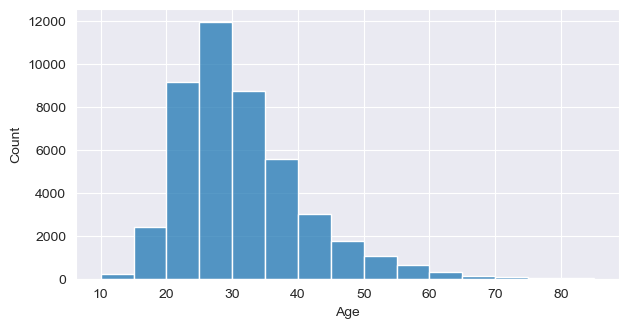

In [60]:
sns.histplot(survey_df.Age, bins= np.arange(10,90,5))

it appears that a large percentage corresponds to the range of age frrom 20-45

## Gender Distribution

([<matplotlib.patches.Wedge at 0x201b66dad10>,
 [Text(-1.0617335815722198, 0.28761398047005066, 'Man'),
  Text(1.054483540358784, -0.31315245985367046, 'Woman'),
  Text(1.0996796455244597, -0.026545757084685182, 'Non-binary')],
 [Text(-0.5791274081303016, 0.15688035298366396, '91.6%'),
  Text(0.5751728401957004, -0.1708104326474566, '7.7%'),
  Text(0.5998252611951598, -0.014479503864373734, '0.8%')])

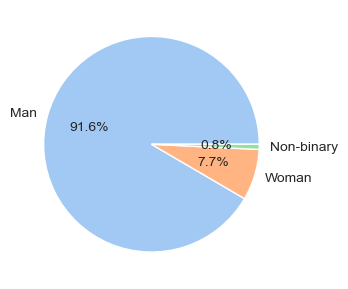

In [61]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

only about 8% are non men.

# Eduaction level

In [62]:
education_lev = survey_df.EdLevel.value_counts()
education_lev

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26356
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13024
Some college/university study without earning a degree                                 7163
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4724
Associate degree (A.A., A.S., etc.)                                                    1831
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1681
Primary/elementary school                                                               929
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  480
Name: EdLevel, dtype: int64

<Axes: title={'center': 'Education level'}, xlabel='EdLevel'>

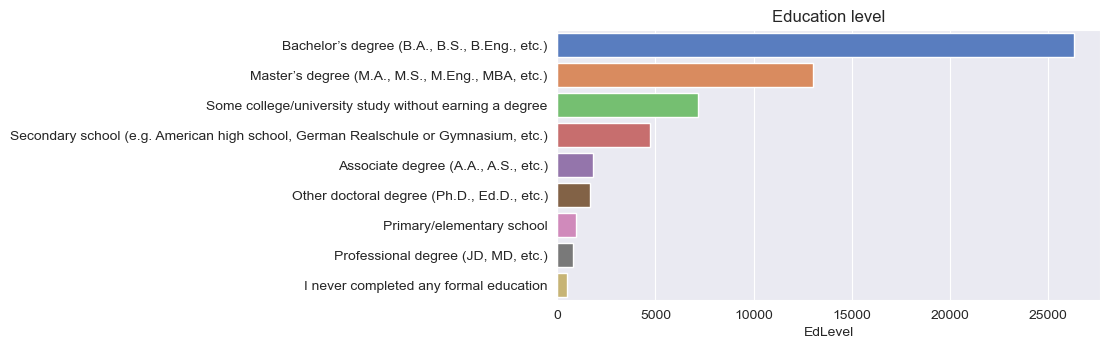

In [63]:
plt.title('Education level')
sns.barplot(x=education_lev, y=education_lev.index, palette='muted')

## Primary major

In [64]:
major_count= survey_df.UndergradMajor.value_counts()
major_count

Computer science, computer engineering, or software engineering                   31353
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4735
Information systems, information technology, or system administration              4041
A natural science (such as biology, chemistry, physics, etc.)                      2185
Mathematics or statistics                                                          1836
Web development or web design                                                      1773
A business discipline (such as accounting, finance, marketing, etc.)               1367
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
I never declared a major                                                            448
A health science (such as nursin

In [65]:
total_count = survey_df.UndergradMajor.count()
total_count

50619

In [66]:
major_percentage = major_count * 100 / total_count
major_percentage

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

<Axes: xlabel='UndergradMajor'>

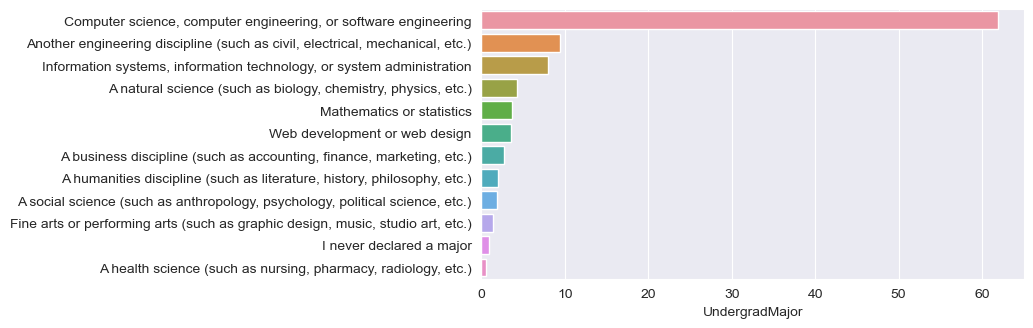

In [67]:
sns.barplot(x = major_percentage, y = major_percentage.index)

around 40% of interviewers represent not computer science students

In [68]:
schema_df_raw.loc["DevType"]

QuestionText    Which of the following describe you? Please se...
Name: DevType, dtype: object

In [69]:
survey_df.DevType.unique()

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan, ...,
       'Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, front-end;System administrator',
       'Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Developer, QA or test;DevOps specialist;Senior executive/VP;System administrator',
       'Data or business analyst;Developer, mobile;Senior executive/VP;System administrator'],
      dtype=object)

In [70]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

#### Which Country do developers work more?

In [174]:
survey_df.Country.value_counts()

United States          12371
India                   8364
United Kingdom          3881
Germany                 3864
Canada                  2175
                       ...  
Nauru                      1
Lesotho                    1
Saint Lucia                1
Antigua and Barbuda        1
Marshall Islands           1
Name: Country, Length: 183, dtype: int64

In [173]:
#top woorking hou countries where interviewers had more than 250 answers
countries_df = survey_df.groupby('Country')['WorkWeekHrs'].mean().sort_values()
high_responses_country = countrie_df.loc[survey_df.Country.value_counts() >250].sort_values(ascending = False).head(10)
high_responses_country

Country
Iran             44.337748
Israel           43.915094
China            42.150000
United States    41.802982
Greece           41.402724
Viet Nam         41.391667
South Africa     41.023460
Turkey           40.982143
Sri Lanka        40.612245
New Zealand      40.457551
Name: WorkWeekHrs, dtype: float64